In [1]:
import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

In [2]:
def init():  
    for i in range(0,n_astros):
        if i < 5:
            astro[i].set_data(np.array([x[0,i], y[0,i]]))
            astro[i].set_3d_properties(z[0,i], 'z')
        elif i==5 or i==6:
            astro[i].set_data(np.array([x[0,i]/2, y[0,i]/2]))
            astro[i].set_3d_properties(z[0,i]/2, 'z')
        elif i==7 or i==8:
            astro[i].set_data(np.array([x[0,i]/3, y[0,i]/3]))
            astro[i].set_3d_properties(z[0,i]/3, 'z')
        else:
            astro[i].set_data(np.array([x[0,i]/5, y[0,i]/5]))
            astro[i].set_3d_properties(z[0,i]/5, 'z')
    return astro

In [3]:
def animate(t):    
    for i in range(0,n_astros):
        if i < 5:
            astro[i].set_data(np.array([x[t,i], y[t,i]]))
            astro[i].set_3d_properties(z[t,i], 'z')
        elif i==5 or i==6:
            astro[i].set_data(np.array([x[t,i]/2, y[t,i]/2]))
            astro[i].set_3d_properties(z[t,i]/2, 'z')
        elif i==7 or i==8:
            astro[i].set_data(np.array([x[t,i]/3, y[t,i]/3]))
            astro[i].set_3d_properties(z[t,i]/3, 'z')
        else:
            astro[i].set_data(np.array([x[t,i]/5, y[t,i]/5]))
            astro[i].set_3d_properties(z[t,i]/5, 'z')
    return astro

In [4]:
posiciones = np.genfromtxt("trayectorias.csv",delimiter=',',skip_header=1)
masas = np.genfromtxt("coordinates.csv",delimiter=',',usecols=[1])
masas_normalizadas = (np.log(masas/masas[0])+20)/20

In [10]:
print(masas_normalizadas)

[ 1.          0.21938461  0.35397244  0.36415509  0.25265939  0.6522982
  0.59192381  0.49799807  0.50606638  0.06348105]


In [5]:
n_puntos = np.int32(posiciones.shape[0]/3)
n_astros = posiciones.shape[1]

In [6]:
id_x = np.array([3*i for i in range(0,n_puntos)])

In [7]:
x = posiciones[id_x,:]
y = posiciones[id_x+1,:]
z = posiciones[id_x+2,:]
trayectorias = np.zeros((x.shape[0],3,n_astros)) 
for i in range(0,n_astros):
    trayectorias[:,:,i] = np.array([x[:,i],z[:,i],y[:,i]]).T

In [8]:
colores = ['orange','#bebebe','#eee8aa','#4682b4','#d2b48c','#f4a460','#eedd82','#afeeee','#87cefa','#deb887']
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
for i in range(0,n_astros):
    if i < 5:
        ax1.plot(x[:,i], y[:,i], z[:,i], colores[i])
    elif i==5 or i==6:
        ax1.plot(x[:,i]/2, y[:,i]/2, z[:,i]/2, colores[i])
    elif i==7 or i==8:
        ax1.plot(x[:,i]/3, y[:,i]/3, z[:,i]/3, colores[i])
    else:
        ax1.plot(x[:,i]/5, y[:,i]/5, z[:,i]/5, colores[i])
ax1.set_xlabel(r'$x$ (UA)', size = 7)
ax1.set_ylabel(r'$y$ (UA)', size = 7)
ax1.set_zlabel(r'$z$ (UA)', size = 7)
ax1.set_title(r'Órbitas de planetas del sistema solar''\n'\
              r'(algunas órbitas son reescaladas para poder observar las 9)', size = 7) 
ax1.tick_params(labelsize = 6)
fig1.savefig('Resultados_hw3.pdf')
plt.close()

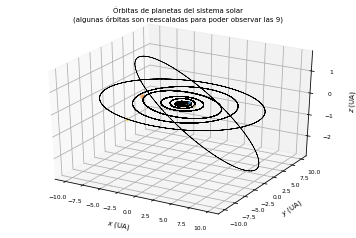

In [9]:
fig2 = plt.figure()
astro = [[] for i in range(0,n_astros)]
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_xlabel(r'$x$ (UA)', size = 7)
ax2.set_ylabel(r'$y$ (UA)', size = 7)
ax2.set_zlabel(r'$z$ (UA)', size = 7)
ax2.set_title(r'Órbitas de planetas del sistema solar''\n'\
              r'(algunas órbitas son reescaladas para poder observar las 9)', size = 7) 
ax2.tick_params(labelsize = 6)
for i in range(0,n_astros):
    if i < 5:
        ax2.plot(x[:,i], y[:,i], z[:,i], '--k', linewidth=0.25)
    elif i==5 or i==6:
        ax2.plot(x[:,i]/2, y[:,i]/2, z[:,i]/2, '--k', linewidth=0.25)
    elif i==7 or i==8:
        ax2.plot(x[:,i]/3, y[:,i]/3, z[:,i]/3, '--k', linewidth=0.25)
    else:
        ax2.plot(x[:,i]/5, y[:,i]/5, z[:,i]/5, '--k', linewidth=0.25)
    astro[i], = ax2.plot([], [], [], color = colores[i], marker = 'o', markersize = masas_normalizadas[i]*5)
animacion_sisSolar = animation.FuncAnimation(fig2, animate, init_func=init,
                               frames=500, interval=100, blit=True)
plt.show()